In [1]:
Pkg.add("QuadGK")
using QuadGK
using Polynomials

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [2]:
# zadanie 1

In [3]:
function Legendre(n)
    if n==0
        return Poly([1])
    end
    if n==1
        return Poly([0,1])
    end
    return Poly([0, ((2 * n - 1) / n)]) * Legendre(n-1) - ((n - 1) / n) * Legendre(n-2)
end

Legendre (generic function with 1 method)

In [4]:
x_s = -1:0.05:1
ys_0 = [polyval(Legendre(0), xi) for xi in x_s]
ys_1 = [polyval(Legendre(1), xi) for xi in x_s]
ys_2 = [polyval(Legendre(2), xi) for xi in x_s]
ys_3 = [polyval(Legendre(3), xi) for xi in x_s]
ys_4 = [polyval(Legendre(4), xi) for xi in x_s]
ys_5 = [polyval(Legendre(5), xi) for xi in x_s]

41-element Array{Float64,1}:
 -1.0000000000000002  
 -0.37274363281249967 
  0.041141249999999845
  0.28566441406249976 
  0.39951999999999954 
  0.41638183593749983 
  0.3651987500000001  
  0.27048988281249975 
  0.15263999999999983 
  0.028194804687499887
 -0.08984375000000011 
 -0.1917221484375001  
 -0.27064000000000005 
  ⋮                   
  0.1917221484375001  
  0.08984375000000011 
 -0.028194804687499887
 -0.15263999999999983 
 -0.27048988281249975 
 -0.3651987500000001  
 -0.41638183593749983 
 -0.39951999999999954 
 -0.28566441406249976 
 -0.041141249999999845
  0.37274363281249967 
  1.0000000000000002  

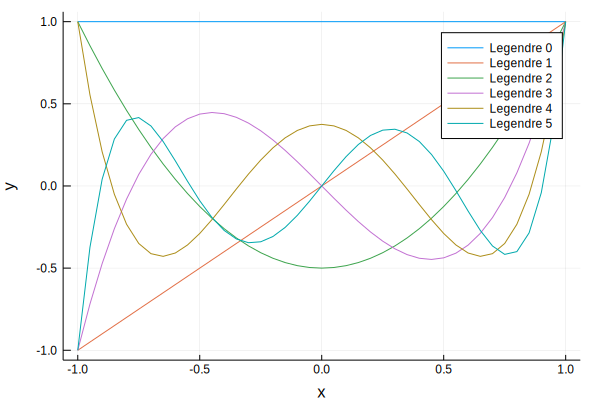

In [5]:
using Plots
plot(x_s, ys_0, label="Legendre 0", xlabel="x", ylabel="y")
plot!(x_s, ys_1, label="Legendre 1", xlabel="x", ylabel="y")
plot!(x_s, ys_2, label="Legendre 2", xlabel="x", ylabel="y")
plot!(x_s, ys_3, label="Legendre 3", xlabel="x", ylabel="y")
plot!(x_s, ys_4, label="Legendre 4", xlabel="x", ylabel="y")
plot!(x_s, ys_5, label="Legendre 5", xlabel="x", ylabel="y")

In [6]:
l2 = Legendre(2)
l3 = Legendre(3)
l4 = Legendre(4)

Poly(0.375 - 3.75*x^2 + 4.375*x^4)

In [7]:
l2_roots = roots(l2)

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

In [8]:
(xp,a)=gauss(Float64,2)

([-0.57735, 0.57735], [1.0, 1.0])

In [9]:
l3_roots = roots(l3)

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414833
  0.0               

In [10]:
(xp,a)=gauss(Float64,3)

([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])

In [12]:
l4_roots = roots(l4)

4-element Array{Float64,1}:
 -0.8611363115940536 
  0.8611363115940531 
 -0.33998104358485653
  0.3399810435848563 

In [13]:
(xp,a)=gauss(Float64,4)

([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

In [ ]:
# zadanie 2

In [14]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
function count_gauss(f, k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp))
end

count_gauss (generic function with 1 method)

In [15]:
count_gauss(x->x^2, 4)

0.666666666666667

In [16]:
count_gauss(x->x^3, 4)

0.0

In [17]:
count_gauss(x->x^4, 4)

0.4000000000000002

In [18]:
count_gauss(x->x^5, 4)

0.0

In [19]:
count_gauss(x->x^6, 4)

0.28571428571428586

In [20]:
count_gauss(x->x^7, 4)

0.0

In [25]:
count_gauss(x->x^8, 4)
# powinno byc 0.22222

0.21061224489795927

In [22]:
count_gauss(x->x^4, 2)
# powinno byc 0.4

0.2222222222222223

In [24]:
# Metoda przestaje być dokładna dla wielomianu stopnia 2n-1 i kolejnych wielomianów.

In [26]:
# zadanie 3

In [27]:
function count_gauss(f, k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp))
end

function normalize(f::Function, a, b)
      return z -> ((b-a)/2)*f((a+b)/2 + (b-a)*z/2)
end

function my_integral(f, a, b, k)
    g = normalize(f, a, b)
    count_gauss(g,k)
end

my_integral (generic function with 1 method)

In [28]:
my_integral(x->x^2, -2, 1, 3)

3.0

In [30]:
my_integral(x->2, -1, 1, 3)

3.9999999999999996

In [31]:
my_integral(x->2, -1, 1, 5)

3.999999999999999

In [32]:
# zadanie 4

In [33]:
quadgk(x->x^3+x^2+12+4, -3, 3)
# powinno byc 114

(114.0, 0.0)

In [34]:
quadgk(x -> (1/sqrt(2*pi))*exp(-(x^2)/2), -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

In [35]:
# zadanie 5

In [40]:
function trapez(a, b, n, f)
    h = (b - a) / n
    s = f(a) + f(b)
    for i = 1:n
        s += 2 * f(a + i * h)
    end
    return (h / 2 * s)
end

trapez (generic function with 1 method)

In [41]:
trapez(-1, 1, 100000, x->x^4)

0.40002000026666756

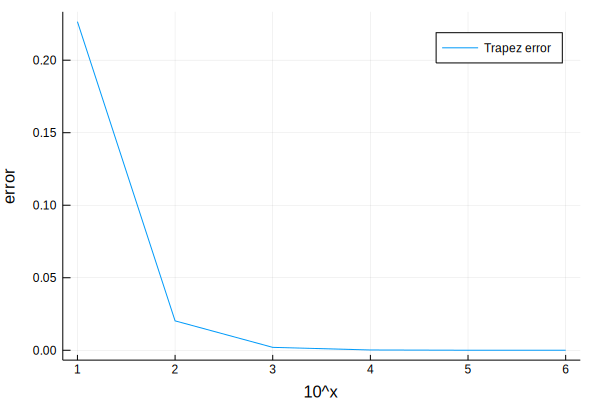

In [43]:
using Plots
y_1 = abs(0.4 - trapezoidal(-1, 1, 10, x->x^4))
y_2 = abs(0.4 - trapezoidal(-1, 1, 100, x->x^4))
y_3 = abs(0.4 - trapezoidal(-1, 1, 1000, x->x^4))
y_4 = abs(0.4 - trapezoidal(-1, 1, 10000, x->x^4))
y_5 = abs(0.4 - trapezoidal(-1, 1, 100000, x->x^4))
y_6 = abs(0.4 - trapezoidal(-1, 1, 1000000, x->x^4))
y_s = [y_1, y_2, y_3, y_4, y_5, y_6]
x_s = [1, 2, 3, 4, 5, 6]
plot(x_s, y_s, label="Trapez error", xlabel="10^x", ylabel="error")